In [1]:
import pandas as pd 
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [2]:
data.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

x = data.iloc[:, :-1]
y = data['TARGET CLASS']

scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state = 42, test_size = 0.2)

Text(28, 0.9439, 'best k value is: 28')

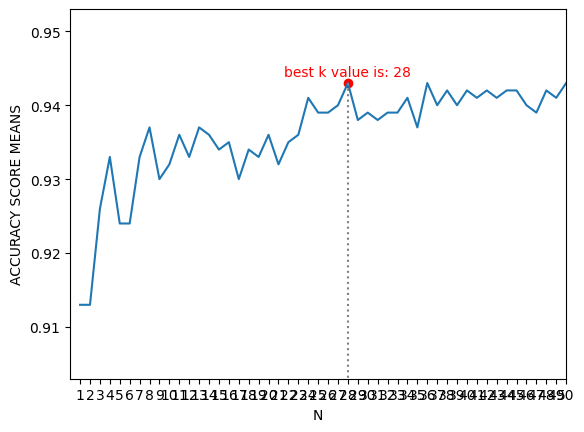

In [5]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

ns = list(range(1,51))

cv_scores = []

for n in ns:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, scaled_x, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
optimal_n = ns[np.argmax(cv_scores)]

plt.plot(ns, cv_scores)
plt.xlabel("N")
plt.ylabel("ACCURACY SCORE MEANS")
plt.scatter(x=optimal_n, y=max(cv_scores), color='red')
plt.axis([0,21, min(cv_scores) - 0.01, max(cv_scores)+0.01])
plt.vlines(optimal_n, 0, max(cv_scores), colors='gray', linestyles='dotted', label='İzdüşüm')
plt.xticks(ns)

plt.text(optimal_n, max(cv_scores)+0.0009, "best k value is: " + str(optimal_n), fontsize=10, color='red', ha='center')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state=42, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=optimal_n)
knn.fit(x_train, y_train)

train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))
print(f1_score(y_train, train_pred))
print(f1_score(y_test, test_pred))

0.94125
0.95
0.942189421894219
0.9504950495049505
